STEP 1: IMPORT NECESSARY LIBRARIES


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

STEP 2: IMPORTING DATASET

In [ ]:
df=pd.read_csv(r'net zero dataset.csv')

In [ ]:
df

,Year,Total fuel used,Coal,Oil,Gas,Nuclear,Low carbon,Renewables,Fossil fuels
0,1995,71.31,35.02,3.13,11.43,21.25,21.59,0.34,49.58
1,1996,73.17,32.40,3.02,15.19,22.18,22.43,0.25,50.61
2,1997,70.07,27.06,1.23,19.32,21.98,22.45,0.47,47.61
3,1998,73.67,28.89,0.85,20.32,23.12,23.61,0.49,50.06
4,1999,72.35,24.51,0.82,24.25,22.22,22.78,0.56,49.57
5,2000,73.18,27.77,0.77,24.40,19.64,20.25,0.61,52.94
6,2001,76.49,30.57,0.82,23.80,20.77,21.30,0.53,55.19
7,2002,75.07,28.62,0.69,25.04,20.10,20.71,0.61,54.36
8,2003,77.34,31.57,0.65,24.48,20.04,20.64,0.60,56.70
9,2004,76.18,30.37,0.58,26.18,18.16,19.04,0.88,57.13


In [ ]:
df=pd.read_csv(r'net zero dataset.csv',parse_dates=["Year"], index_col="Year")


In [ ]:
df

,Total fuel used,Coal,Oil,Gas,Nuclear,Low carbon,Renewables,Fossil fuels
Year,,,,,,,,
1995-01-01,71.31,35.02,3.13,11.43,21.25,21.59,0.34,49.58
1996-01-01,73.17,32.40,3.02,15.19,22.18,22.43,0.25,50.61
1997-01-01,70.07,27.06,1.23,19.32,21.98,22.45,0.47,47.61
1998-01-01,73.67,28.89,0.85,20.32,23.12,23.61,0.49,50.06
1999-01-01,72.35,24.51,0.82,24.25,22.22,22.78,0.56,49.57
2000-01-01,73.18,27.77,0.77,24.40,19.64,20.25,0.61,52.94
2001-01-01,76.49,30.57,0.82,23.80,20.77,21.30,0.53,55.19
2002-01-01,75.07,28.62,0.69,25.04,20.10,20.71,0.61,54.36
2003-01-01,77.34,31.57,0.65,24.48,20.04,20.64,0.60,56.70


##STEP 3: DATA PREPROCESSING
This step includes removing columns we do not need, check missing values, aggregate Fuel usage by date and so on.

In [ ]:
print(df.isna().sum())

Total fuel used    0
Coal               0
Oil                0
Gas                0
Nuclear            0
Low carbon         0
Renewables         0
Fossil fuels       0
dtype: int64


In [ ]:
df.interpolate(method='time', inplace=True)


In [ ]:
df_sel=df.drop(['Total fuel used', 'Coal', 'Oil ', 'Gas', 'Nuclear ', 'Low carbon ', 'Fossil fuels '],axis=1)

In [ ]:
df_sel

,Renewables
Year,
1995-01-01,0.34
1996-01-01,0.25
1997-01-01,0.47
1998-01-01,0.49
1999-01-01,0.56
2000-01-01,0.61
2001-01-01,0.53
2002-01-01,0.61
2003-01-01,0.60


In [ ]:
df_sel.columns

Index(['Renewables '], dtype='object')

In [ ]:
df_sel.isnull().sum()

Renewables     0
dtype: int64

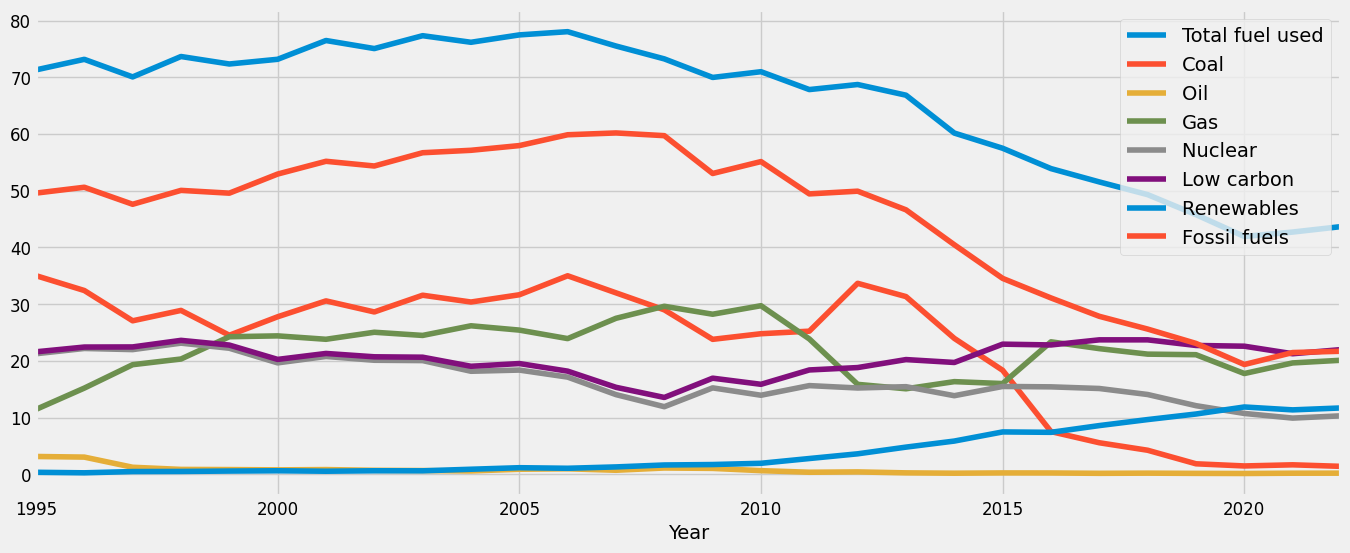

In [ ]:
#visualizing original dataset
df.plot(figsize=(15, 6))
plt.show()

##STEP 4: VISUALIZING RENEWABLE ENERGY AND FOSSIL FUELS TIME SERIES DATA

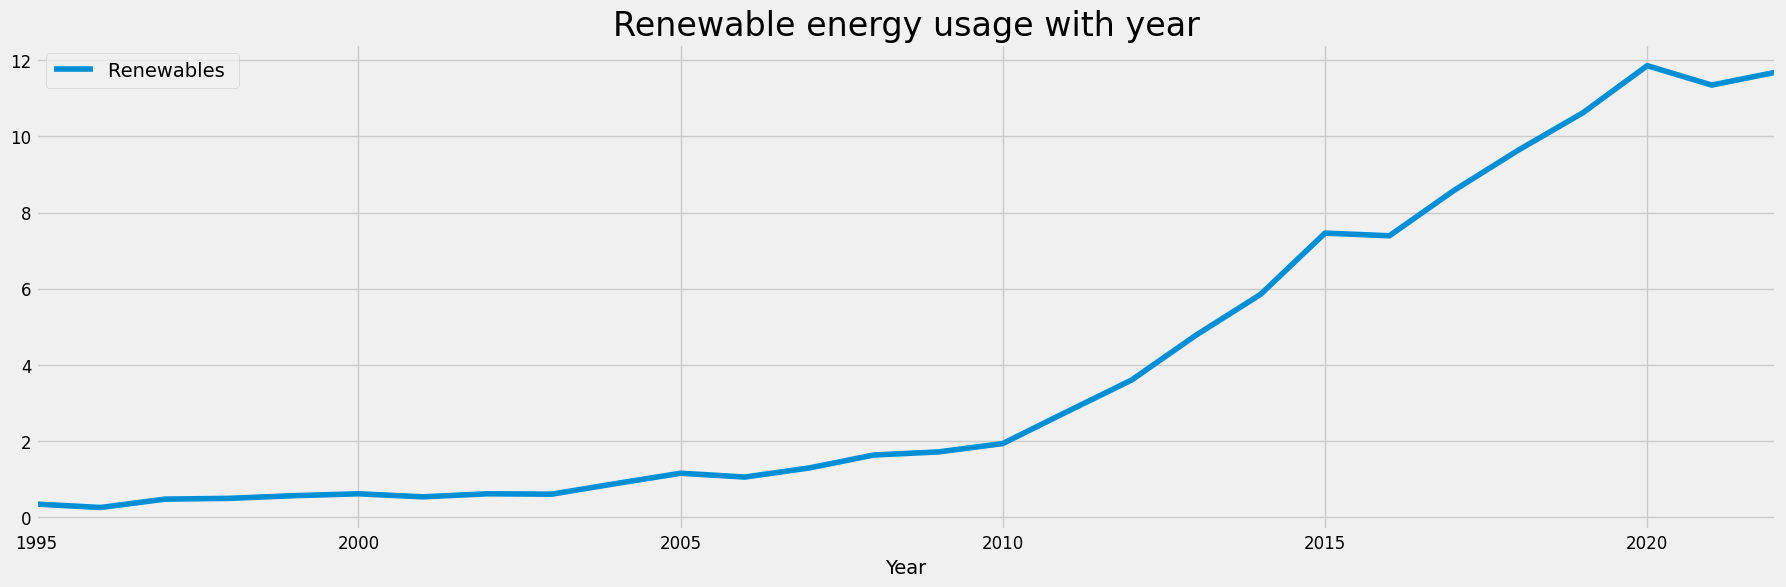

In [ ]:
ax = df_sel.plot(figsize=(20, 6))
ax.set_title('Renewable energy usage with year', fontsize=24);

In [ ]:
df_sel1=df.drop(['Coal', 'Oil ', 'Gas', 'Nuclear ', 'Low carbon ','Renewables ', 'Fossil fuels '],axis=1)

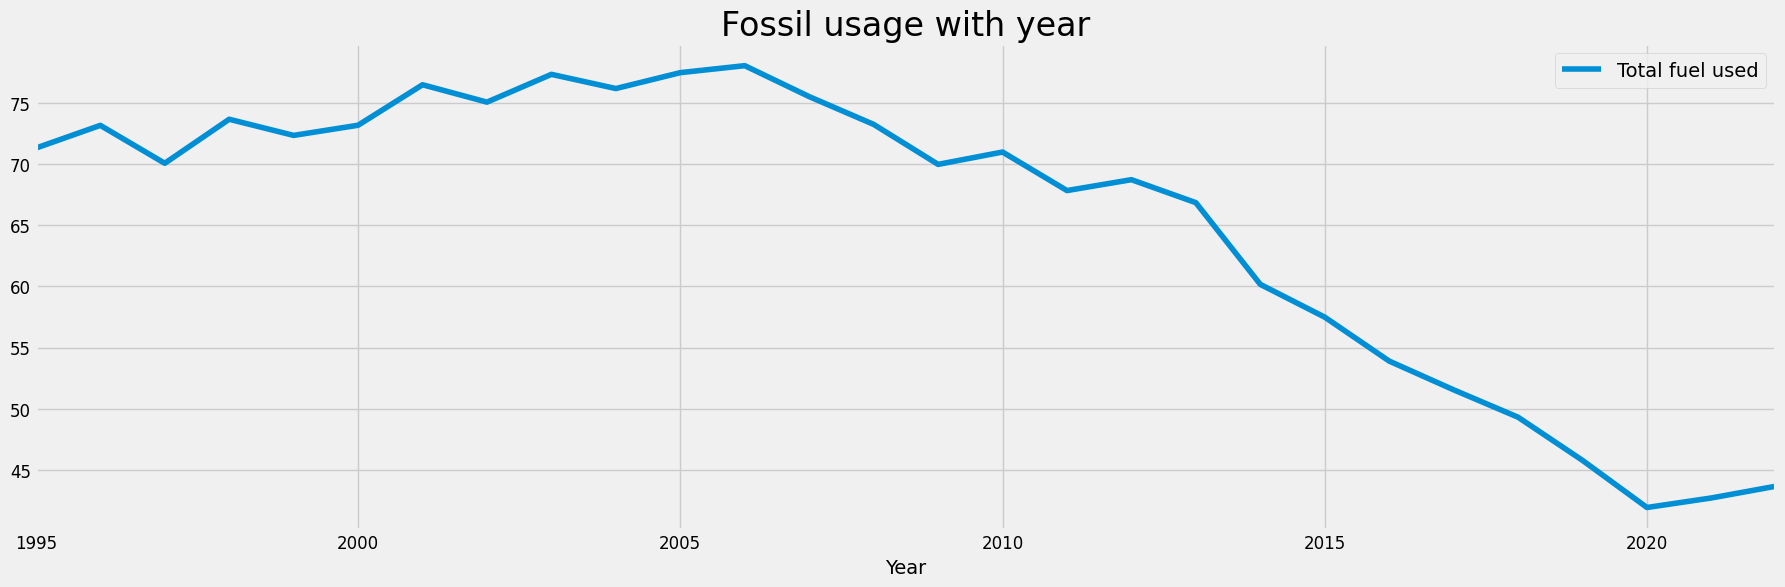

In [ ]:
ax = df_sel1.plot(figsize=(20, 6))
ax.set_title('Fossil usage with year', fontsize=24);

In [ ]:
df['Year'].min()

Timestamp('1995-01-01 00:00:00')

In [ ]:
df['Year'].max()

Timestamp('2022-01-01 00:00:00')

In [ ]:
df_select=df.drop(['Renewables ', 'Coal', 'Oil ', 'Gas', 'Nuclear ', 'Low carbon ', 'Total fuel used'],axis=1)
df_select

,Year,Fossil fuels
0,1995-01-01,49.58
1,1996-01-01,50.61
2,1997-01-01,47.61
3,1998-01-01,50.06
4,1999-01-01,49.57
5,2000-01-01,52.94
6,2001-01-01,55.19
7,2002-01-01,54.36
8,2003-01-01,56.70
9,2004-01-01,57.13


In [ ]:
df_select = df_select.set_index('Year')
df_select.index

DatetimeIndex(['1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

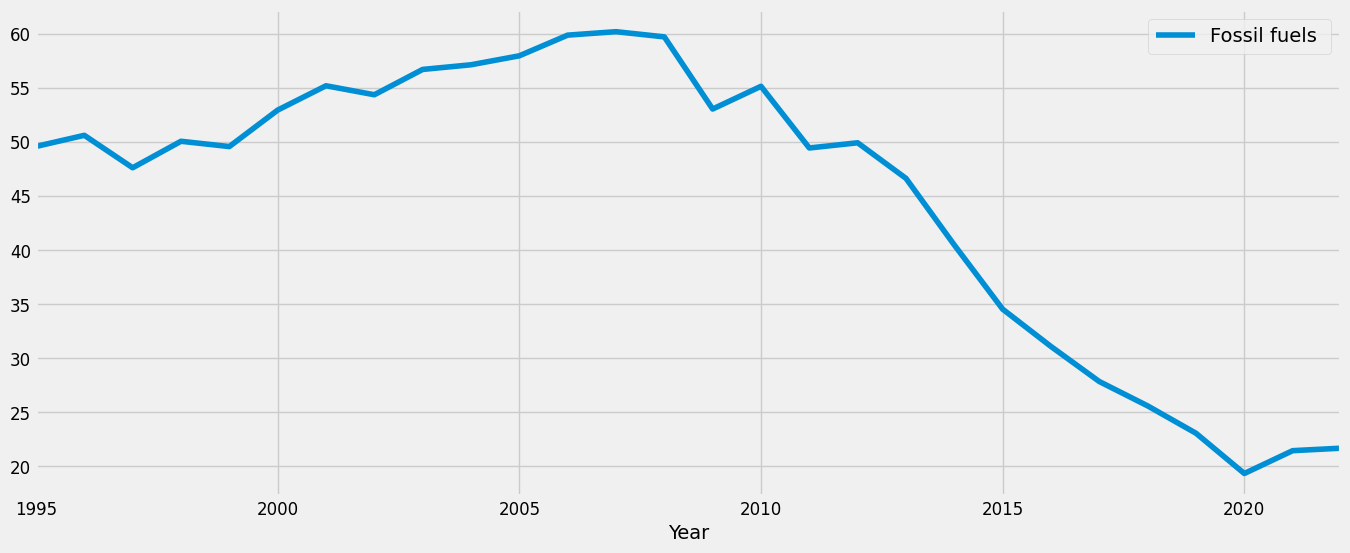

In [ ]:
df_select.plot(figsize=(15, 6))
plt.show()

##STEP 5:TIME SERIES DECOMPOSITION
We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

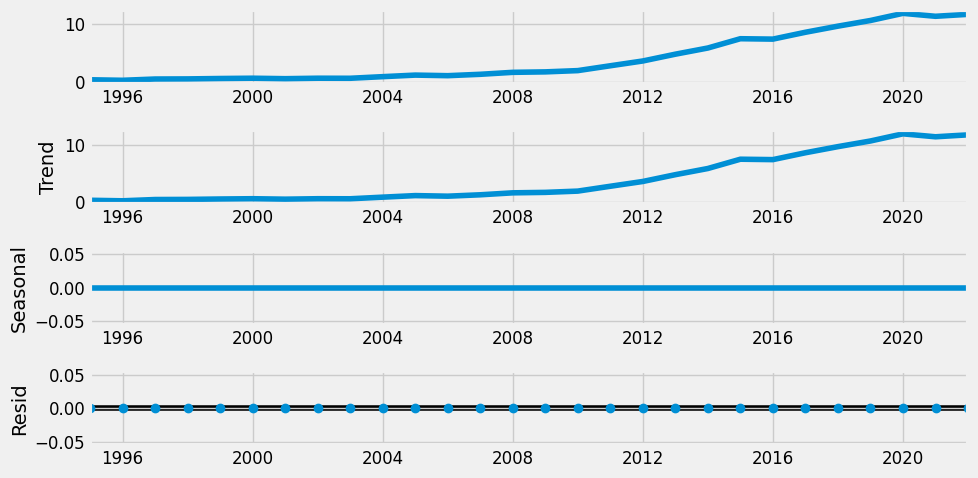

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

decomposition = sm.tsa.seasonal_decompose(df_sel, model='additive')
fig = decomposition.plot()
plt.show()

## STEP 6:Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model



In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Fitting the model

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df_sel,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),

                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.078     12.772      0.000       0.846       1.153
ma.L1         -0.9904      0.899     -1.102      0.270      -2.752       0.771
ar.S.L12       0.8196      0.352      2.326      0.020       0.129       1.510
sigma2         0.1273      0.207      0.616      0.538      -0.278       0.532


Model Diagnostics to find unusual behaviour






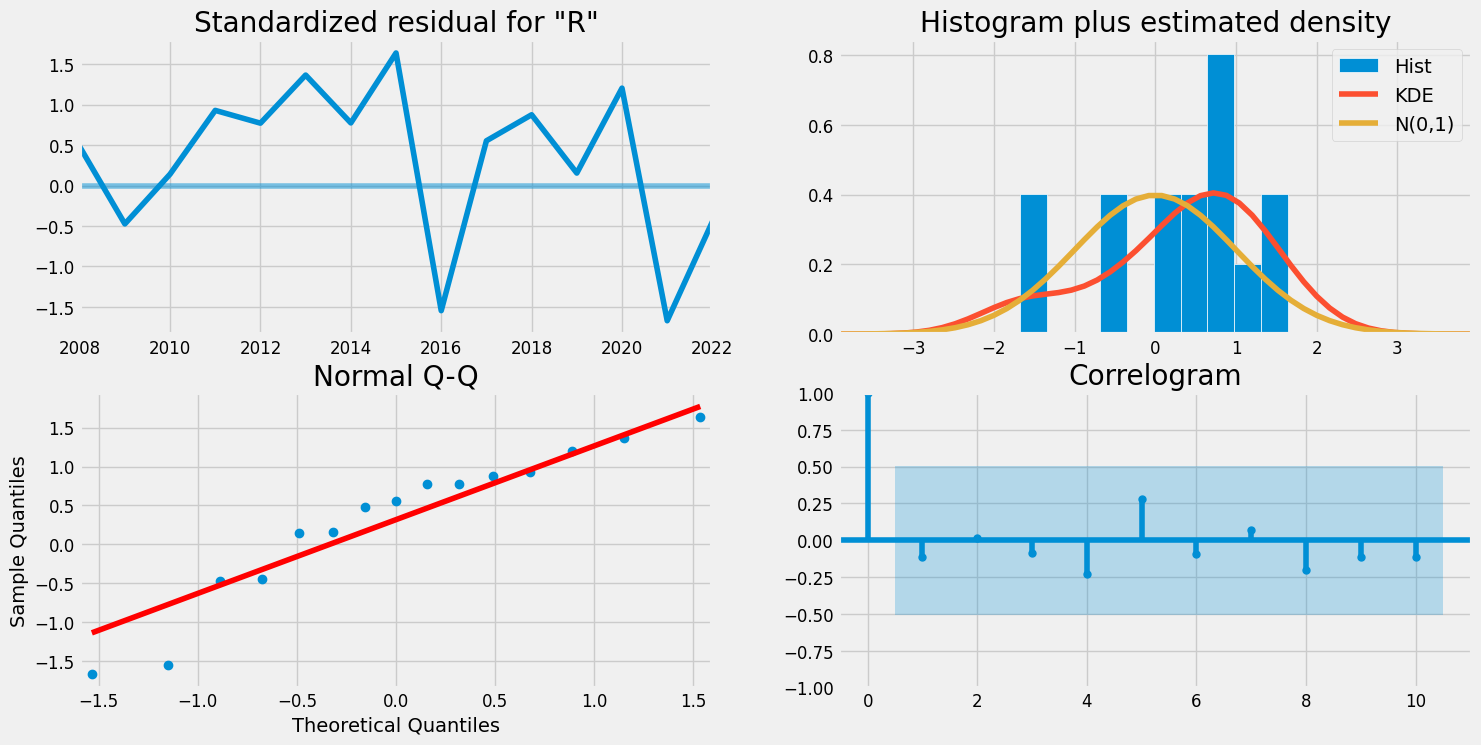

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

##STEP 6: MAKING PREDICTIONS
To help us understand the accuracy of the forecast, we compare predicted energy use to real values in
the time series. For this, we set the forecast so that it starts from 2017 to the end of the data

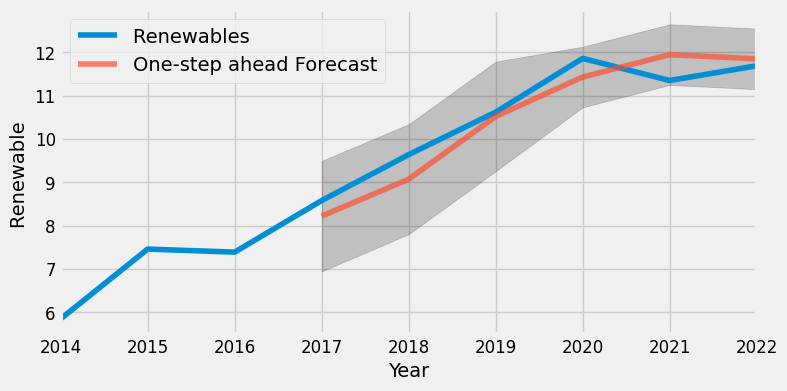

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_sel['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Renewable ')
plt.legend()

plt.show()

##STEP 7: PRODUCING AND VISUALIZING FORECASTS

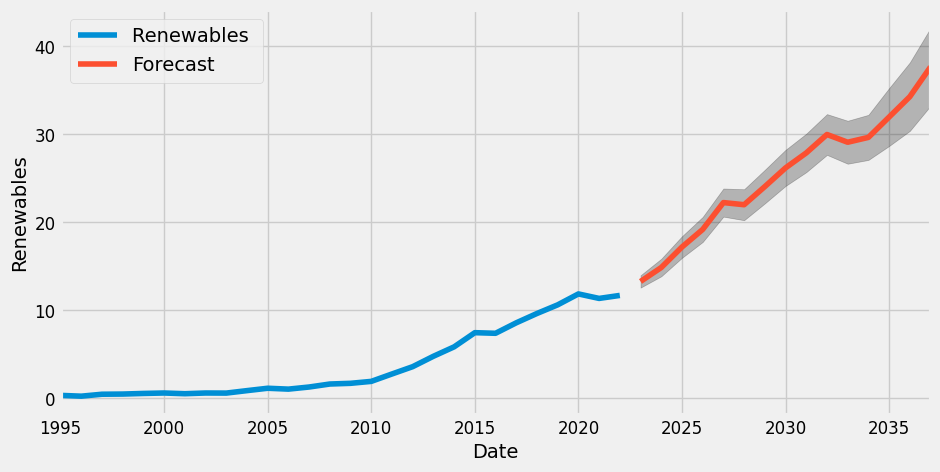

In [ ]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = df_sel.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Renewables')

plt.legend()
plt.show()

SO FAR WE DID THE TIME SERIES ANALYSIS FOR RENEWABLES, NOW REPEATING THE SAME FOR FOSSIL FUEL

In [ ]:
df_select

,Fossil fuels
Year,
1995-01-01,49.58
1996-01-01,50.61
1997-01-01,47.61
1998-01-01,50.06
1999-01-01,49.57
2000-01-01,52.94
2001-01-01,55.19
2002-01-01,54.36
2003-01-01,56.70


TIME SERIES DECOMPOSITION

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

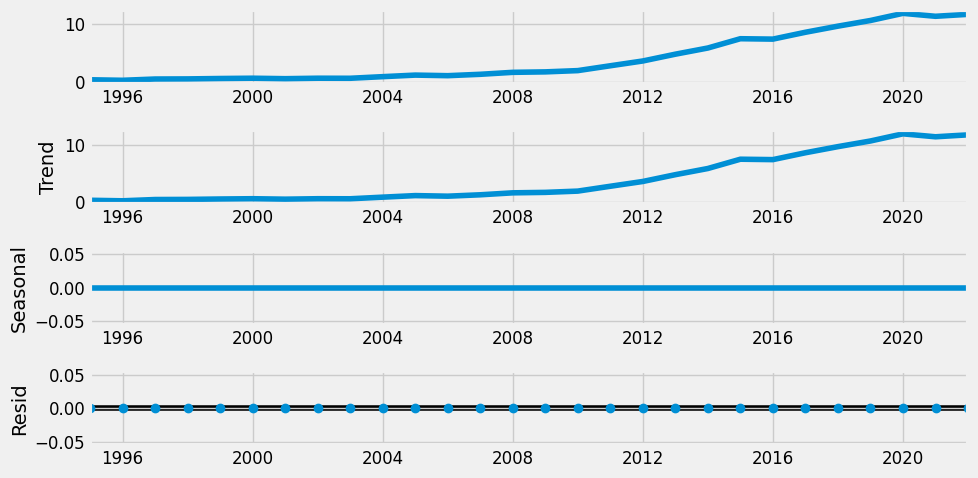

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

decomposition = sm.tsa.seasonal_decompose(df_sel, model='additive')
fig = decomposition.plot()
plt.show()

Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_select,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results1 = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:35.5804700694779
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:35.5804700694779
ARIMA(0, 1, 0)x(0, 1, 0, 12)

Fitting the model

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df_select,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),

                                enforce_invertibility=False)

results1 = mod.fit()

print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8704      0.295      2.950      0.003       0.292       1.449
ma.L1         -0.5428      0.990     -0.548      0.584      -2.483       1.398
ar.S.L12      -0.3354      7.064     -0.047      0.962     -14.180      13.509
sigma2        12.2053     62.048      0.197      0.844    -109.406     133.817


Model Diagnostics to find unusual behaviour


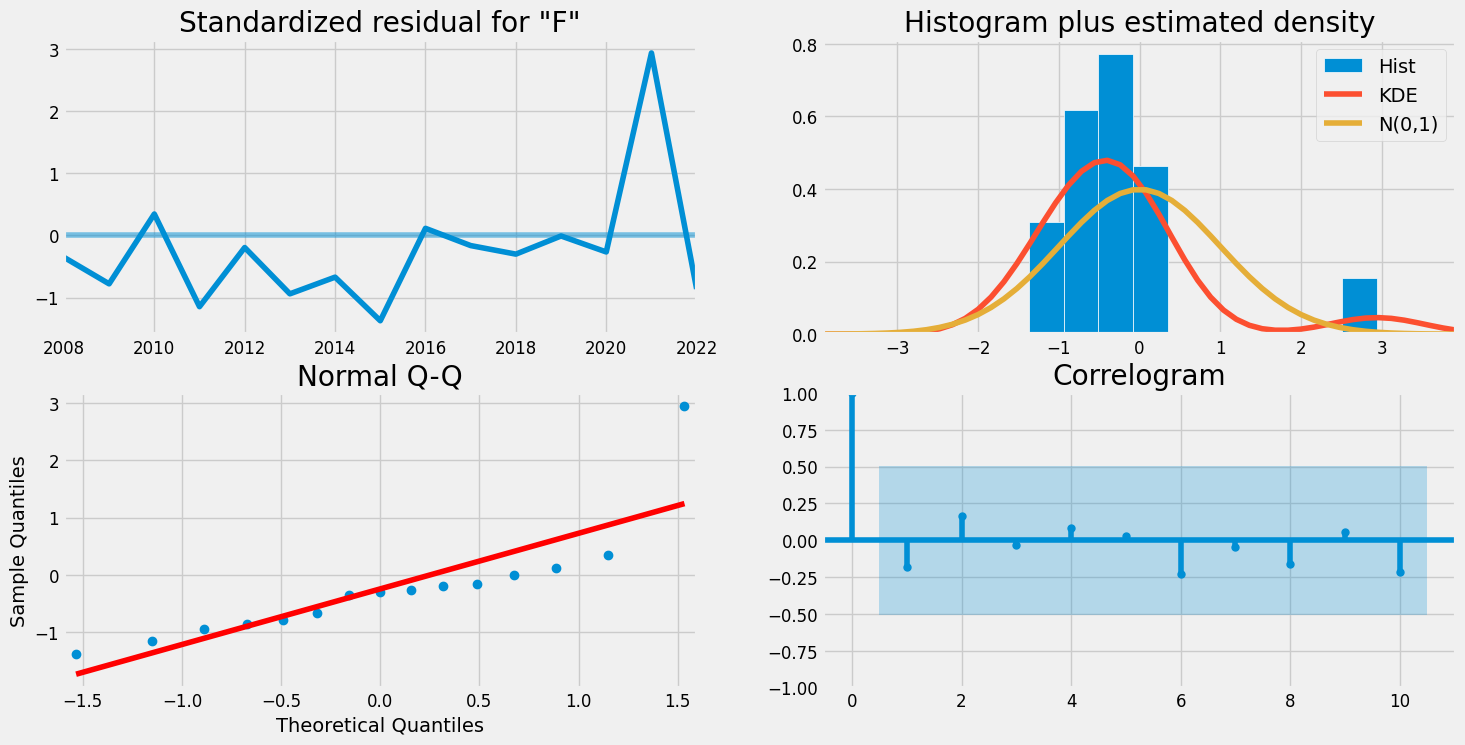

In [ ]:
results1.plot_diagnostics(figsize=(16, 8))
plt.show()

MAKING PREDICTIONS

To help us understand the accuracy of the forecast, we compare predicted energy use to real values in
the time series. For this, we set the forecast so that it starts from 2017 to the end of the data

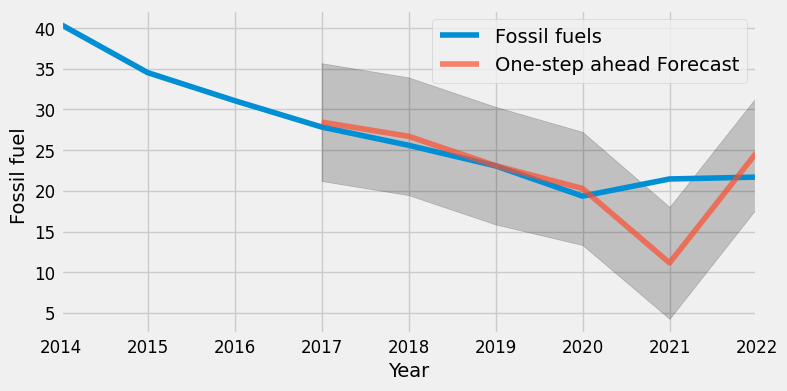

In [ ]:
pred = results1.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_select['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Fossil fuel ')
plt.legend()

plt.show()

PRODUCING AND VISUALIZING FORECASTS

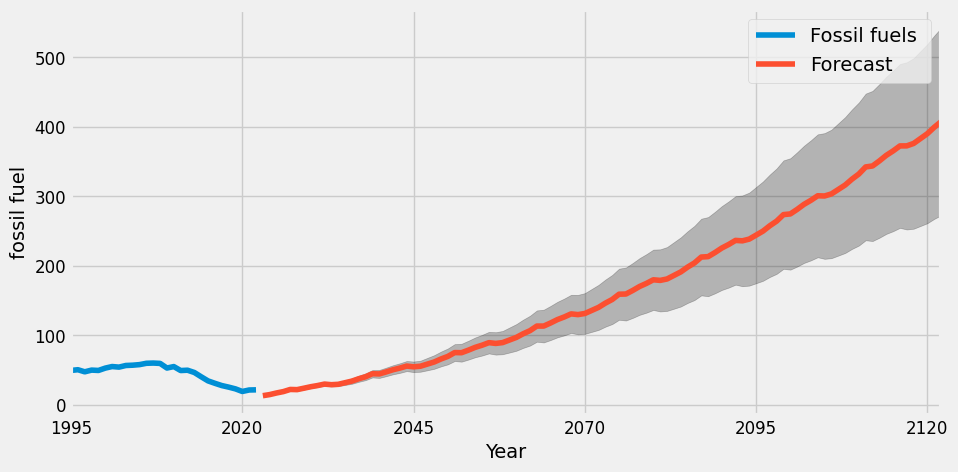

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = df_select.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('fossil fuel')

plt.legend()
plt.show()

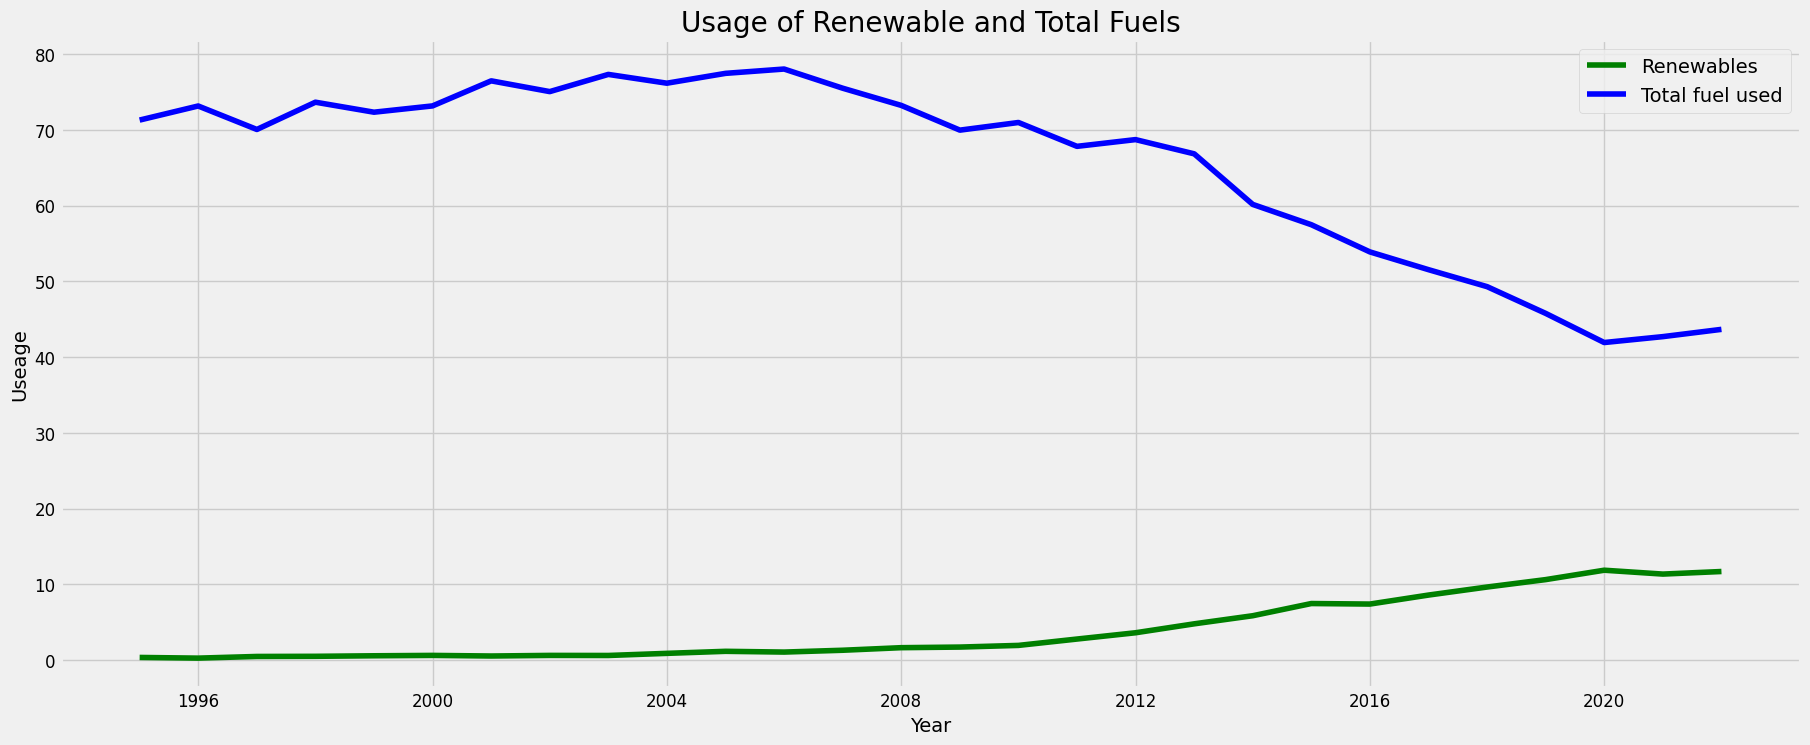

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df['Year'], df['Renewables '], 'g-', label = 'Renewables')
plt.plot(df['Year'], df['Total fuel used'], 'b-', label = 'Total fuel used')
plt.xlabel('Year'); plt.ylabel('Useage'); plt.title('Usage of Renewable and Total Fuels')
plt.legend();

COMPARING FORECASTS OF BOTH DATASET

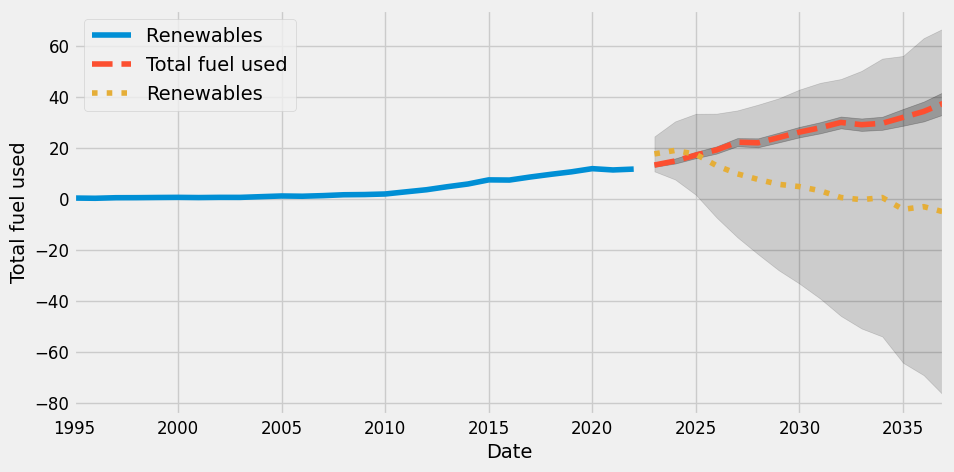

In [ ]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = df_sel.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Total fuel used', linestyle='--') # Add linestyle to differentiate between the two datasets
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# Add the second dataset to the same plot
pred_uc2 = results1.get_forecast(steps=15) # Assuming results2 is the result obtained from the second code block
pred_ci2 = pred_uc2.conf_int()
pred_uc2.predicted_mean.plot(ax=ax, label='Renewables', linestyle=':') # Add linestyle to differentiate between the two datasets
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.15) # Use a lighter color for the second dataset

ax.set_xlabel('Date')
ax.set_ylabel('Total fuel used')
plt.legend()
plt.show()


In [ ]:
df_month=pd.read_excel(r'net zero data.xlsx')
min_month = "1990-01"
max_month = "2022-12"

months = pd.period_range(min_month, max_month, freq='M')

In [ ]:
X=df_month['Date']
y=df_month['Renewables']

IMPORTING AND FITTING THE DATA IN RANDOM FOREST REGRESSOR

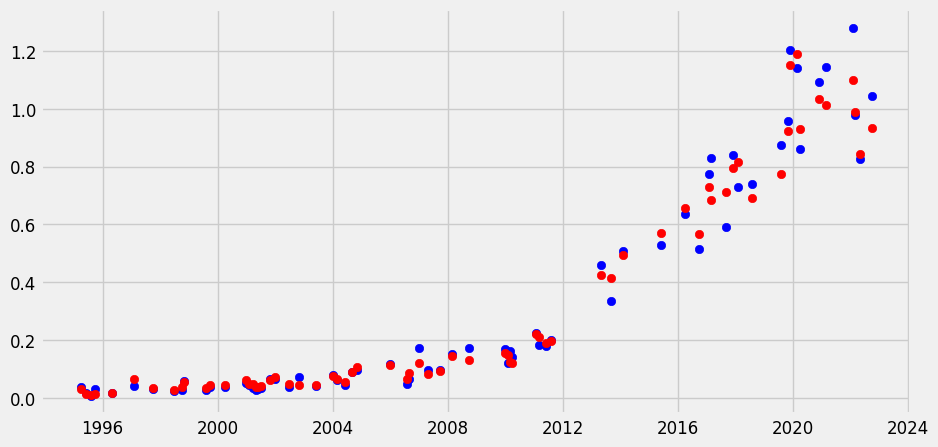

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
X=X.values.reshape(-1,1)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
Y_train=Y_train.values.reshape(-1,1)
rf.fit(X_train,Y_train)

y_pred=rf.predict(X_test)
plt.scatter(X_test,Y_test, color="blue", label="original")
plt.scatter(X_test, y_pred, color="red", label="predicted")

MODEL EVALUATION

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)
rf_score=rf.score(X_test,Y_test)
print('Mean Absolute error',mae)
print('Mean Squared Error',mse)
print('R2 score:',rf_score)

Mean Absolute error 0.030404882352941077
Mean Squared Error 0.0023666203494117507
R2 score: 0.9839095490182518
